In [384]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.datasets import load_sample_images

(-0.5, 639.5, 426.5, -0.5)

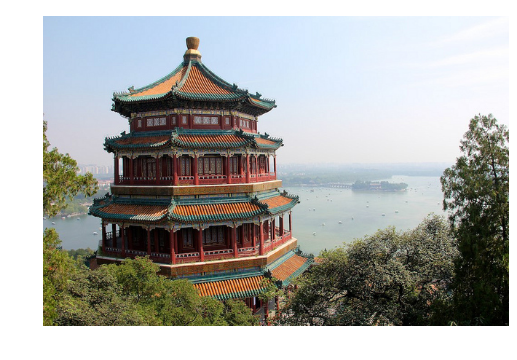

In [385]:
# Sample
plt.imshow(load_sample_images().images[0], cmap='Greys_r')
plt.axis('off')

In [386]:
def principal_components(A, n_components = 50):
    # A is a 2D matrix representing grayscale pixel values of an image
    
    # normalizing the matrix by subtracting the mean (along columns)
    A_norm = (A-np.mean(A.T,axis=1)).T
    
    # computing eigenvalues and eigenvectors of covariance matrix
    [e_vals,e_vecs] = np.linalg.eig(np.cov(A_norm))
    
    # sorting the eigenvalues and eigenvectors in descending order
    idx = np.argsort(-e_vals) 
    e_vals = e_vals[idx]
    e_vecs = e_vecs[:,idx]
    
    # taking only the top n_components
    e_vals = e_vals[:n_components]
    e_vecs = e_vecs[:,range(n_components)].real

    # projection of the data in the new space
    proj = np.dot(e_vecs.T,A_norm)

    return e_vecs,proj,e_vals

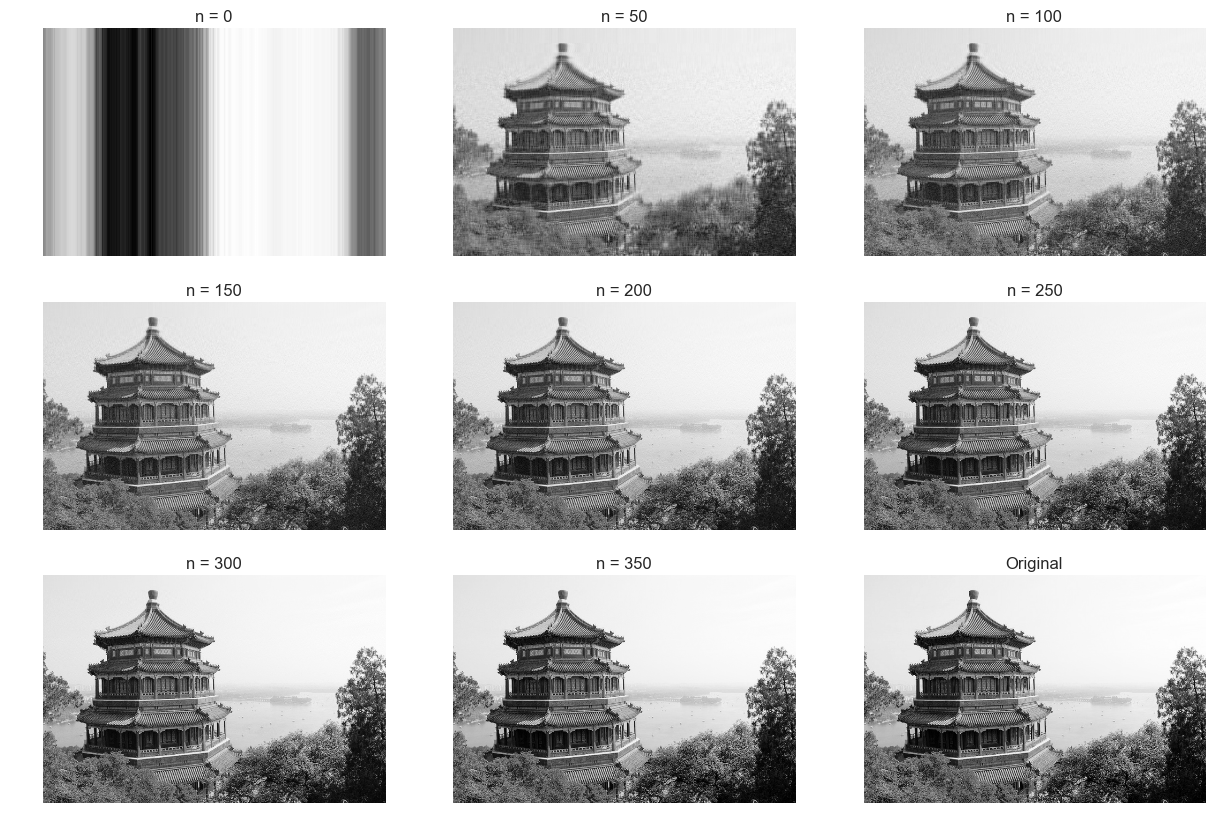

In [387]:
X = load_sample_images().images[0]

# if RGB, convert to grayscale
if len(X.shape) > 2:
    X = np.mean(X,2)

# number of columns
n_components = np.size(X,axis=1)

dist = []

max_components = 350
step = 50

i = 1
n_columns = 3
n_images = max_components/step/n_columns + 1

fig = plt.figure(figsize=(15, 10))

for n in range(0,max_components+step,step):
    e_vecs,proj,e_vals = principal_components(X, n)
    
    # Reconstructing original image from the projection
    Xr = np.dot(e_vecs,proj).T + np.mean(X,axis=0)
    
    # Distance between original and reconstruction
    dist.append(np.linalg.norm(X-Xr))
    
    fig.add_subplot(n_images, n_columns, i)
    plt.imshow(Xr, cmap='Greys_r')
    plt.axis('off')
    plt.title("n = %d" % n)
    
    i += 1

fig.add_subplot(n_images, n_columns, i)
plt.imshow(A, cmap='Greys_r')
plt.axis('off')
plt.title("Original")

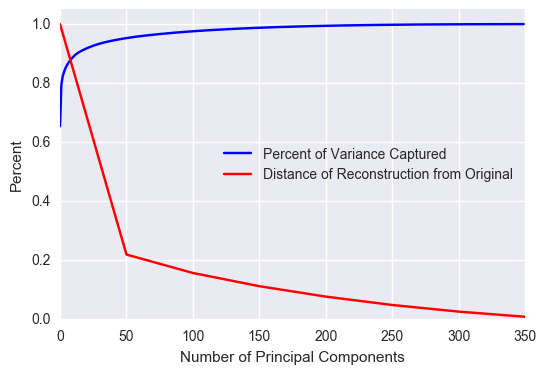

In [400]:
# Percent of original variance accounted for
percent = np.cumsum(e_vals)/sum(e_vals)

# Difference between the original and the rescontruction
dist = dist/max(dist)

plt.plot(range(len(percent)),percent,'b', label="Percent of Variance Captured")
plt.plot(range(0,max_components+step,step),dist,'r', label="Distance of Reconstruction from Original")
plt.axis([0,max_components,0,1.05])
plt.legend(loc="center right")
plt.ylabel("Percent")
plt.xlabel("Number of Principal Components")